## Building Reaction SMARTS

How to construct reaction SMARTS patterns to describe your polymerisation

<b>requirements: RDKit<b>

In [1]:
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')   
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

### Example 1: A simple condensation reaction

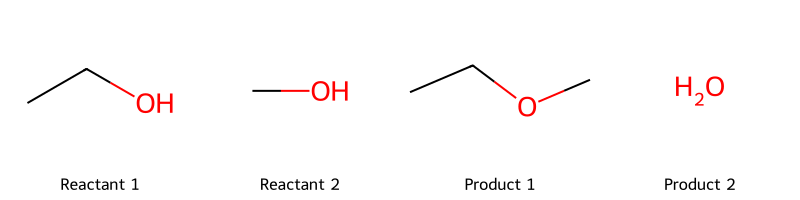

In [2]:
# A simple condensation
reactant1 = Chem.MolFromSmiles('CCO')
reactant2 = Chem.MolFromSmiles('CO')
product1 = Chem.MolFromSmiles('CCOC')
product2 = Chem.MolFromSmiles('O')
captions = ['Reactant 1', 'Reactant 2', 'Product 1', 'Product 2']
Draw.MolsToGridImage([reactant1, reactant2, product1, product2], molsPerRow=4, subImgSize=(200,200), legends=captions)

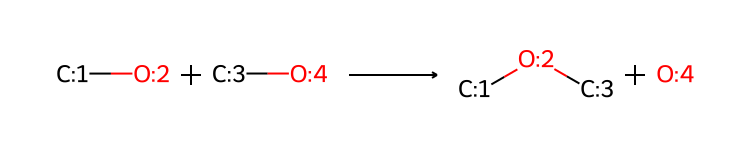

In [3]:
# View Reaction - Implicit Hydrogens used
# The reaction is defined as a SMARTS string, with index of atoms specified to guide reaction to form the correct products
# '.' is used to separate each reactant and product
# '>>' is used to indicate the reaction direction
rxn_smarts = '[C:1]-[O:2].[C:3]-[O:4]>>[C:1]-[O:2]-[C:3].[O:4]'
condensation = AllChem.ReactionFromSmarts(rxn_smarts)
condensation

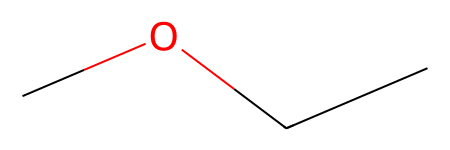

In [4]:
# Perform reaction and view organic product
condensation.RunReactants((reactant1, reactant2))[0][0]

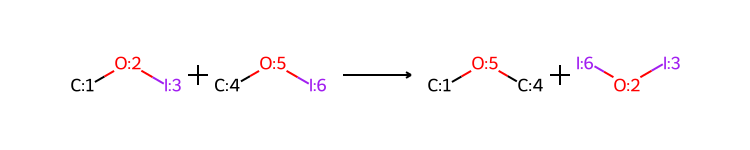

In [5]:
# Reaction in SwiftPol format - using Iodine to mark reaction sites
condensation_swiftpol = AllChem.ReactionFromSmarts('[C:1]-[O:2]-[I:3].[C:4]-[O:5]-[I:6]>>[C:1]-[O:5]-[C:4].[I:3]-[O:2]-[I:6]')
condensation_swiftpol

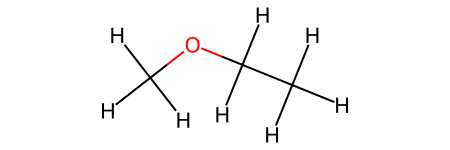

In [6]:
from swiftpol import build
build.build_polymer(sequence = 'AB',
                    monomer_list= ['ICCOI', 'ICOI'], # Iodine is used to mark reaction sites
                    reaction = condensation_swiftpol)

### Other Examples

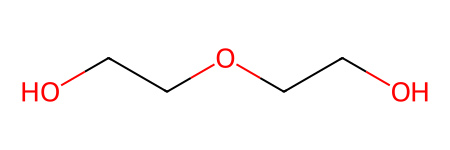

In [7]:
# Polyethylene glycol
PEG = Chem.MolFromSmiles('OCCO')
peg_reaction = AllChem.ReactionFromSmarts('[C:1]-[O:2].[C:3]-[O:4]>>[C:1]-[O:2]-[C:3].[O:4]')
peg_reaction.RunReactants((PEG, PEG))[0][0]

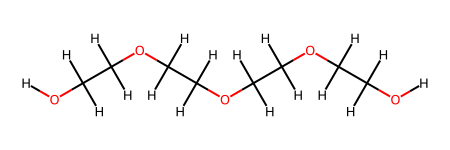

In [8]:
# Build PEG using SwiftPol
build.build_polymer('AAAA',
                    ['IOCCOI'], # Iodine is used to mark reaction sites
                    AllChem.ReactionFromSmarts('[C:1]-[O:2]-[I:3].[C:4]-[O:5]-[I:6]>>[C:1]-[O:2]-[C:4].[I:3][O:5][I:6]')
)

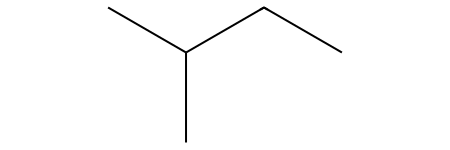

In [9]:
# Polyolephin Formation
reactant1 = Chem.MolFromSmiles('C=CC')
reactant2 = Chem.MolFromSmiles('C=C')
polyolephin_rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[C:4]>>[C:1][C:2][C:3][C:4]') # Double bonds are opened to form a single hydrocarbon chain
polyolephin_rxn.RunReactants((reactant1, reactant2))[0][0]

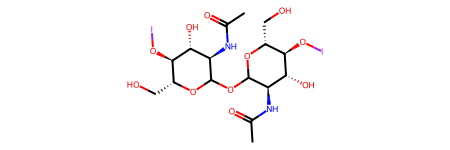

In [11]:
# Chitin Formation
GlcNAc = Chem.MolFromSmiles('CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O') # GlcNAc with iodinated 1,4 positions
chitin_rxn = AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
chitin_rxn.RunReactants((GlcNAc, GlcNAc))[0][0]

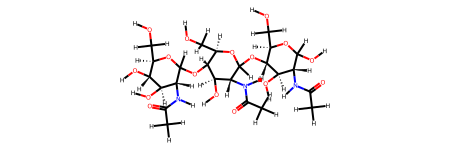

In [12]:
# Build Chitin using SwiftPol
build.build_polymer('AAA',
                    ['CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O'], # Iodine is used to mark reaction sites
                    AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
)

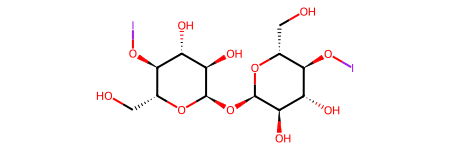

In [13]:
# Cellulose Formation
glucose = Chem.MolFromSmiles("C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)O)O)OI)O") # Glucose with iodinated 1,4 positions
cellulose_rxn = AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
cellulose_rxn.RunReactants((glucose, glucose))[0][0]

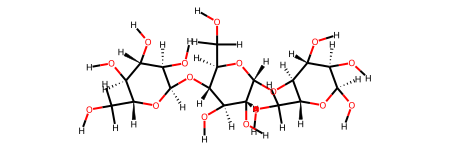

In [14]:
# Build Cellulose using SwiftPol
build.build_polymer('AAA',
                    ["C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)O)O)OI)O"], # Iodine is used to mark reaction sites
                    AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
)

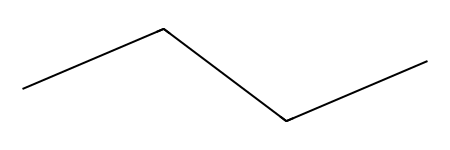

In [17]:
# Polyethene Formation
ethene = Chem.MolFromSmiles('C=C')
polyethene_rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[C:4]>>[C:1][C:2][C:3][C:4]')
polyethene_rxn.RunReactants((ethene, ethene))[0][0]

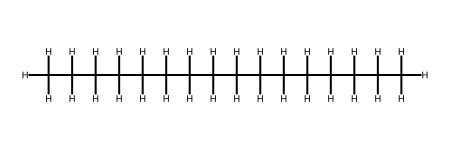

In [18]:
# Build Polyethene using SwiftPol
build.build_polymer('AAAAAAAA',
                    ['ICCI'], # Iodine is used to mark reaction sites
                    AllChem.ReactionFromSmarts('[C:1][C:2]-[I:3].[C:4][C:5]-[I:6]>>[C:1][C:2][C:5][C:4].[I:3][I:6]')
)

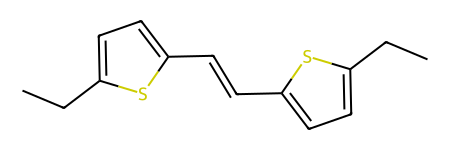

In [19]:
# Alkene with a polythiophene linker
PT = Chem.MolFromSmiles('S1C(CC)=CC=C(CC)1')
polythiophene_rxn = AllChem.ReactionFromSmarts('[C:1]-[C:2].[C:3]-[C:4]>>[C:1]=[C:3].[C:2]-[C:4]') # Polythiophene units joined together whilst maintaining ring structure
polythiophene_rxn.RunReactants((PT, PT))[0][0]

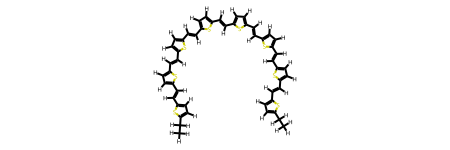

In [21]:
# Build Polythiophene using SwiftPol
build.build_polymer('AAAAAAAA',
                    ['S1C(CCI)=CC=C(CCI)1'],
                    AllChem.ReactionFromSmarts('[H:7]-[C:1]-[C:2]-[I:3].[H:8]-[C:4]-[C:5]-[I:6]>>[C:1]=[C:4].[I:3]-[C:2]([H:7])-[C:5]([H:8])-[I:6]')
)

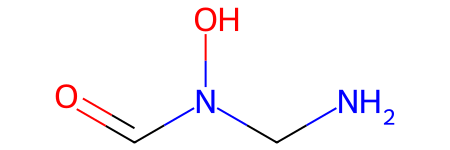

In [22]:
# Polyamide Formation
amide = Chem.MolFromSmiles('C(=O)N')
polyamide_rxn = AllChem.ReactionFromSmarts('[C:1]=[O:2].[N:3]>>[C:1][N:3][O:2]')
polyamide_rxn.RunReactants((amide, amide))[0][0]


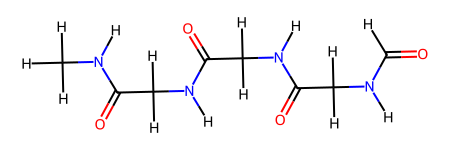

In [23]:
# Build Polyamide using SwiftPol
build.build_polymer('AAAA',
                    ['IC(=O)NCI'], # Iodine is used to mark reaction sites
                    AllChem.ReactionFromSmarts('[C:1][I:2].[C:3][I:4]>>[C:1][C:3].[I:2][I:4]')
)